# Name - POOJA NAINANI

# The Sparks Foundation - EXPLORATORY DATA ANALYSIS

# Task 4 - Exploratory Data Analysis on dataset 'Global Terrorism'

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Importing dataset 

data=pd.read_csv("globalterrorism.csv", encoding='ISO-8859-1')
data.head()

C:\Users\pooja\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


# Data Wrangling

In [3]:
#Columns which are required

data=data[['iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 'provstate', 'city', 'attacktype1_txt','targtype1_txt', 
        'gname', 'motive', 'weaptype1_txt', 'nkill', 'nwound']]

In [4]:
#Renaming the columns
data.rename(columns={'iyear':'Year', 'imonth':'Month', 'iday':'Day', 'country_txt':'Country', 'region_txt':'Region',
                    'provstate':'State', 'city':'City', 'attacktype1_txt':'AttackType', 'targtype1_txt':'TargetType',
                    'gname':'GroupName', 'motive':'Motive', 'weaptype1_txt':'WeaponType', 
                    'nkill':'Killed', 'nwound':'Wounded'}, inplace=True)
data.head()

,Year,Month,Day,Country,Region,State,City,AttackType,TargetType,GroupName,Motive,WeaponType,Killed,Wounded
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN


In [5]:
#To check null values

data.isnull().sum()

Year               0
Month              0
Day                0
Country            0
Region             0
State            421
City             434
AttackType         0
TargetType         0
GroupName          0
Motive        131130
WeaponType         0
Killed         10313
Wounded        16311
dtype: int64

In [6]:
data['Killed']=data['Killed'].fillna(0).astype(int)
data['Wounded']=data['Wounded'].fillna(0).astype(int)

In [7]:
#Basic analysis from Dataset

print("Country with the most attacks:", data['Country'].value_counts().index[0])
print("Region with the most attacks:", data['Region'].value_counts().index[0])
print("City with the highest number of attacks:",data['City'].value_counts().index[1])
print("Year with most attacks:", data['Year'].value_counts().index[0])
print("Month with most attacks:", data['Month'].value_counts().index[0])
print("Most attack type:", data['AttackType'].value_counts().index[0])
print("Most target type:", data['TargetType'].value_counts().index[0])
print("Most attcks done by Group:", data['GroupName'].value_counts().index[1])
print("Weapon used mostly for attack:", data['WeaponType'].value_counts().index[0])

Country with the most attacks: Iraq
Region with the most attacks: Middle East & North Africa
City with the highest number of attacks: Baghdad
Year with most attacks: 2014
Month with most attacks: 5
Most attack type: Bombing/Explosion
Most target type: Private Citizens & Property
Most attcks done by Group: Taliban
Weapon used mostly for attack: Explosives


In [8]:
#Dropping columns not required further for visualization

data.drop(["Month", "Day", "Motive", "State"], axis=1, inplace=True)

# Data visualization

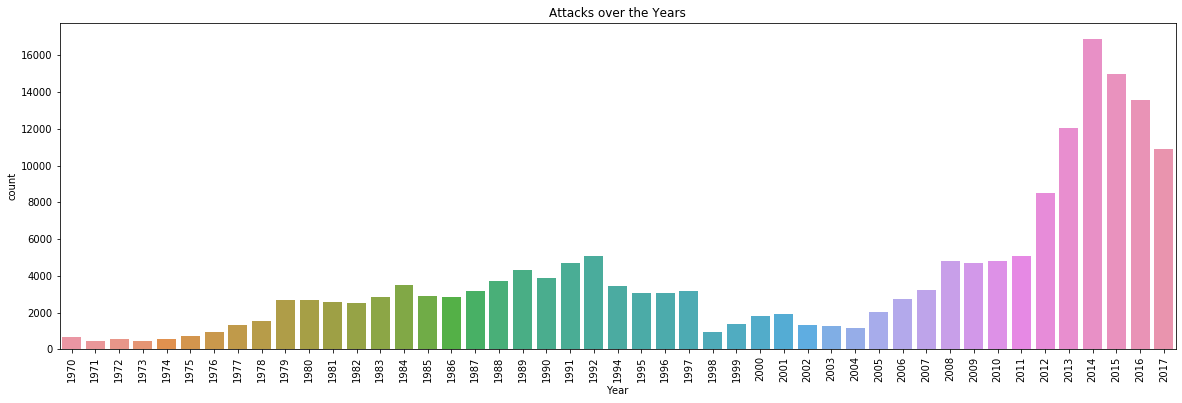

In [9]:
#Terrorist Activities took place each year

plt.subplots(figsize=(20,6))
sns.countplot('Year', data=data)
plt.title('Attacks over the Years')
plt.xticks(rotation=90)
plt.show()

 Most attacks has been taken place in the year 2014

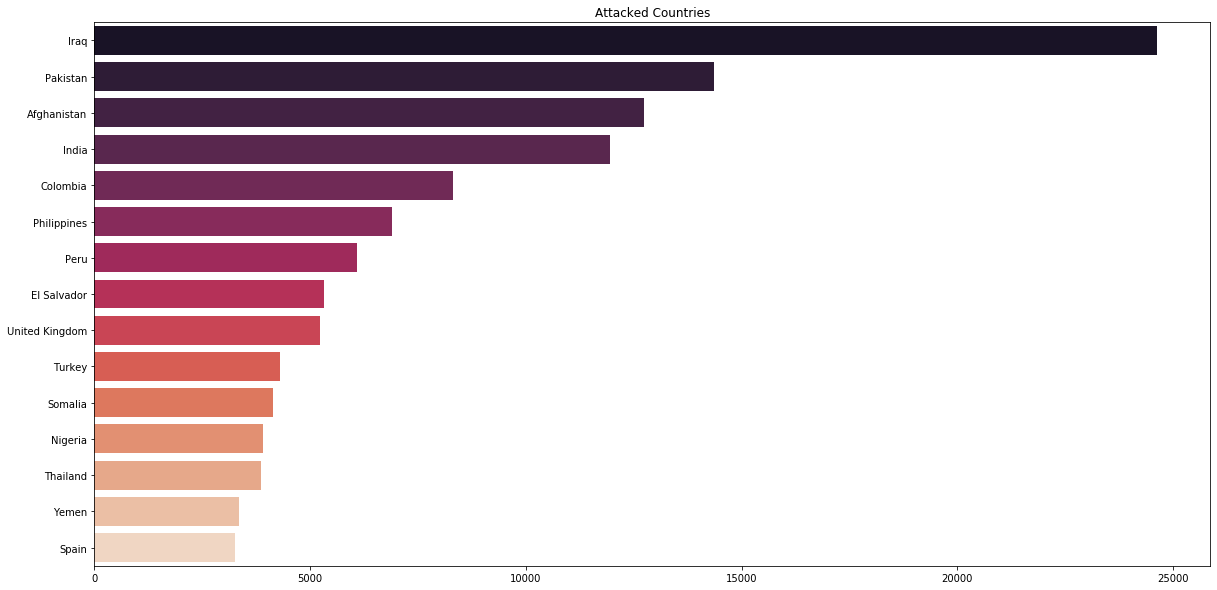

In [10]:
#Attacked Countries

plt.subplots(figsize=(20,10))
sns.barplot(x=data['Country'].value_counts()[:15].values,y=data['Country'].value_counts()[:15].index,
           palette='rocket')
plt.title('Attacked Countries')
       
plt.show()

Above plot shows top 15 countries most affected by terrorist ativities 


IRAQ has been the worst hit among all

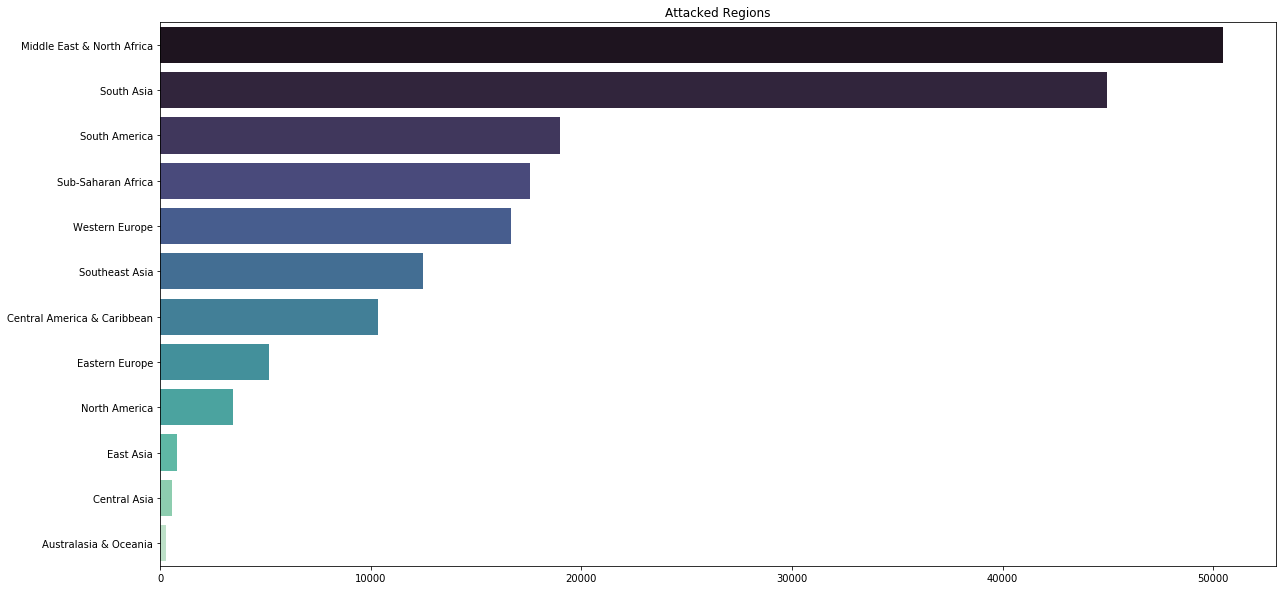

In [11]:
#Region wise attacks
plt.subplots(figsize=(20,10))
sns.barplot(x=data['Region'].value_counts().values,y=data['Region'].value_counts().index,
           palette='mako')
plt.title('Attacked Regions')      
plt.show()

Above shows Middle East & North Africa Region has been most affected

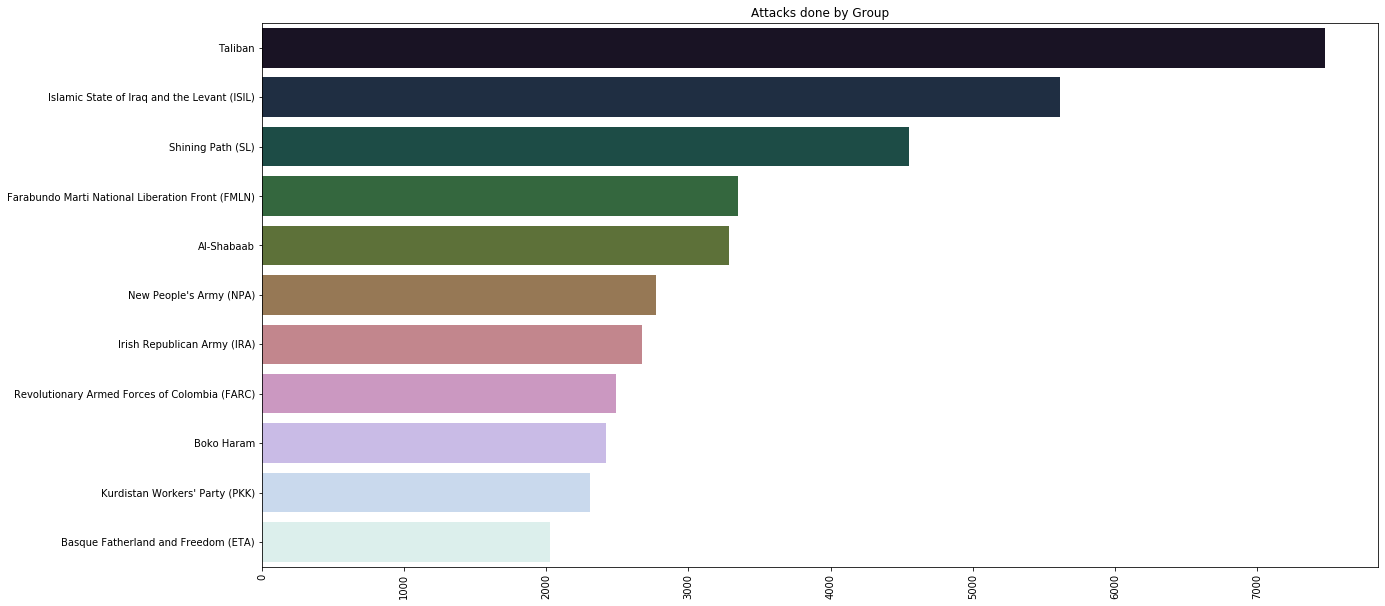

In [12]:
#Attacks done by Groups

plt.subplots(figsize=(20,10))
sns.barplot(x=data['GroupName'].value_counts()[1:12].values,y=data['GroupName'].value_counts()[1:12].index,
           palette='cubehelix')
plt.title("Attacks done by Group")

plt.xticks(rotation=90)   

plt.show()

Highest attacks are done by Taliban Group



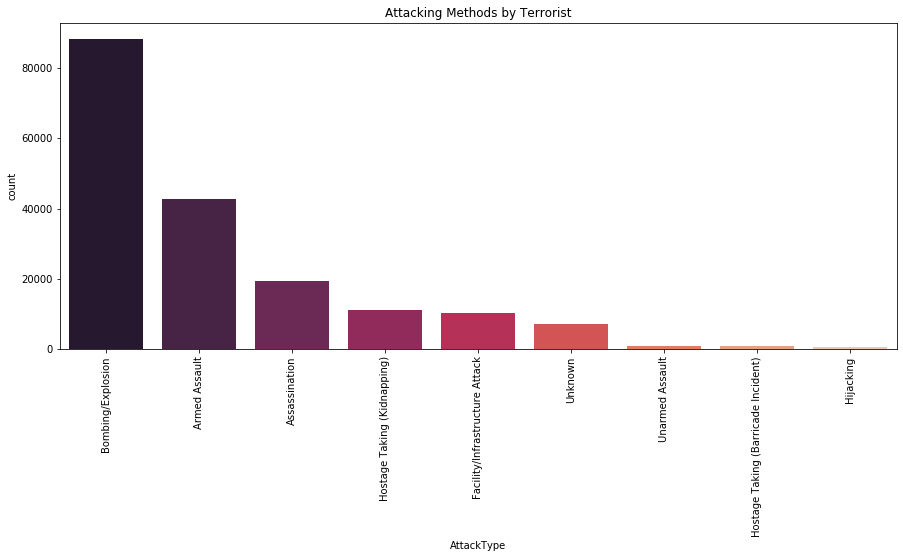

In [13]:
#Most used attacking methods by terrorist

plt.subplots(figsize=(15,6))
sns.countplot(x='AttackType', data=data, palette="rocket", order=data['AttackType'].value_counts().index)
plt.title('Attacking Methods by Terrorist')
plt.xticks(rotation=90)   
plt.show()


Bombing/Explosion has been the main tool by terrorists

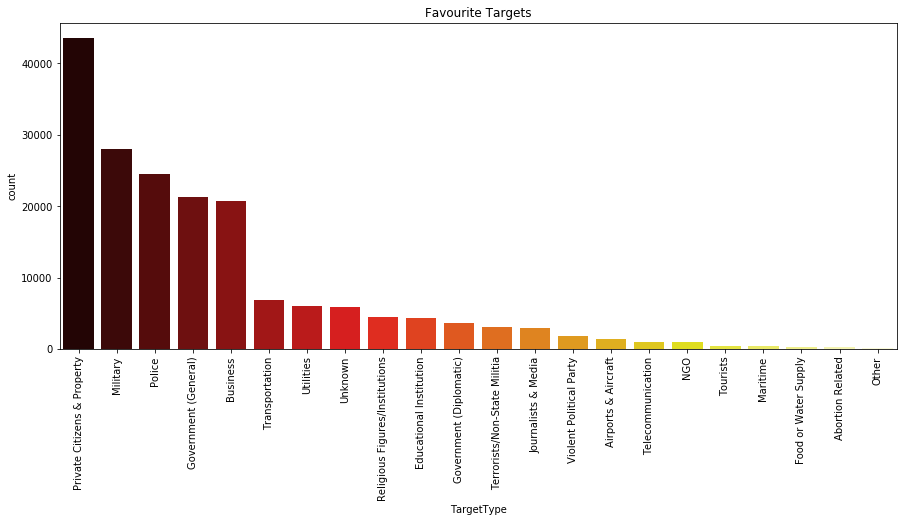

In [14]:
#Mostly targeted

plt.subplots(figsize=(15,6))
sns.countplot(x='TargetType', data=data, palette="hot", order=data['TargetType'].value_counts().index)
plt.title('Favourite Targets')
plt.xticks(rotation=90)   
plt.show()


Private Citizens & Property have always been hot target by Terrorists

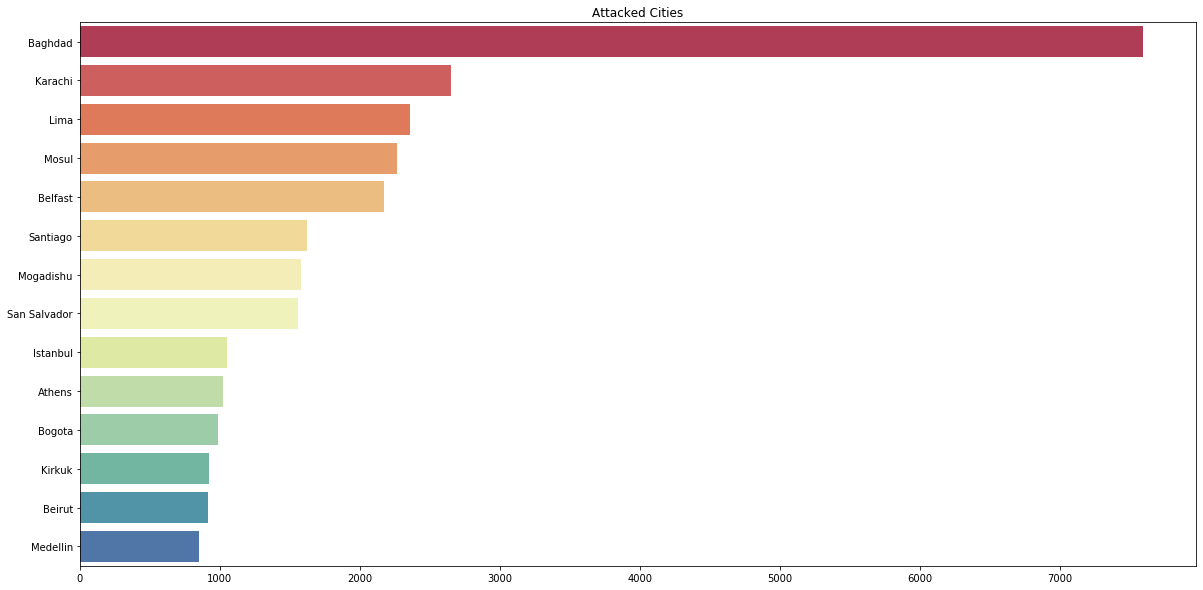

In [15]:
#Most Attcked cities

plt.subplots(figsize=(20,10))
sns.barplot(x=data['City'].value_counts()[1:15].values,y=data['City'].value_counts()[1:15].index,
           palette='Spectral')
plt.title('Attacked Cities')
       
plt.show()

 From above plot Baghdad has been most affected 

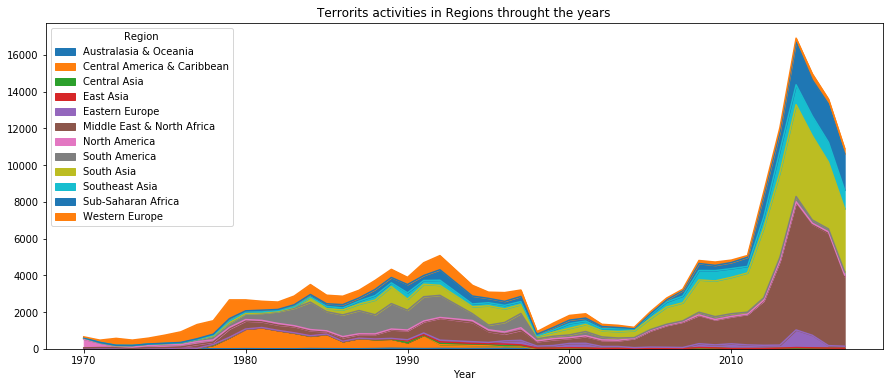

In [16]:
#Terrorits activities in Regions throught the years

pd.crosstab(data.Year, data.Region).plot(kind='area', figsize=(15,6))
plt.title('Terrorits activities in Regions throught the years')
plt.show()

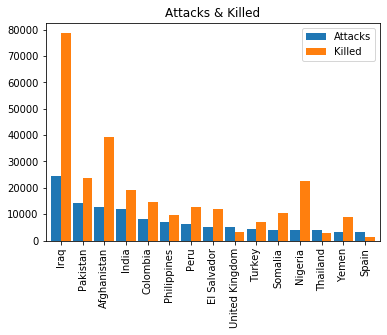

In [17]:
#Most attacks in country and people killed in those attacks

country = data['Country'].value_counts()[:15].to_frame()
country.columns=["Attacks"]
killed=data.groupby('Country')['Killed'].sum().to_frame()
country.merge(killed,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
plt.title('Attacks & Killed')
plt.show()

# Thank You